In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
len(df)

48895

In [4]:
base = ['neighbourhood_group', 'room_type',
        'latitude', 'longitude', 'minimum_nights', 
        'number_of_reviews', 'reviews_per_month', 
        'calculated_host_listings_count', 'availability_365']

selected_cols = base + ['price']

df = df[selected_cols]
df.head()

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,Brooklyn,Private room,40.64749,-73.97237,1,9,0.21,6,365,149
1,Manhattan,Entire home/apt,40.75362,-73.98377,1,45,0.38,2,355,225
2,Manhattan,Private room,40.80902,-73.94190,3,0,NaN,1,365,150
3,Brooklyn,Entire home/apt,40.68514,-73.95976,1,270,4.64,1,194,89
4,Manhattan,Entire home/apt,40.79851,-73.94399,10,9,0.10,1,0,80


In [5]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Question 1

In [6]:
df.neighbourhood_group.mode()

0    Manhattan
dtype: object

# Question 2

In [7]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

Reset index to avoid identification of data order

In [8]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Split features and target variable

In [9]:
df_train.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price                               int64
dtype: object

In [10]:
corr_matrix = df_train.corr().abs()
corr_matrix

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
latitude,1.000000,0.080301,0.027441,0.006246,0.007159,0.019375,0.005891,0.035428
longitude,0.080301,1.000000,0.060660,0.055084,0.134642,0.117041,0.083666,0.146318
minimum_nights,0.027441,0.060660,1.000000,0.076020,0.120703,0.118647,0.138901,0.046668
number_of_reviews,0.006246,0.055084,0.076020,1.000000,0.590374,0.073167,0.174477,0.048225
reviews_per_month,0.007159,0.134642,0.120703,0.590374,1.000000,0.048767,0.165376,0.052908
calculated_host_listings_count,0.019375,0.117041,0.118647,0.073167,0.048767,1.000000,0.225913,0.053746
availability_365,0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000,0.080121
price,0.035428,0.146318,0.046668,0.048225,0.052908,0.053746,0.080121,1.000000


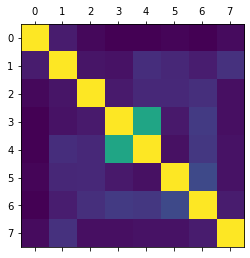

In [11]:
plt.matshow(corr_matrix)
plt.show()

In [12]:
corr_matrix.replace(1.0, 0.0).max()

latitude                          0.080301
longitude                         0.146318
minimum_nights                    0.138901
number_of_reviews                 0.590374
reviews_per_month                 0.590374
calculated_host_listings_count    0.225913
availability_365                  0.225913
price                             0.146318
dtype: float64

# Question 3

In [13]:
df_train['above_average'] = df_train.price >= 152
df_val['above_average'] = df_val.price >= 152
df_test['above_average'] = df_test.price >= 152

In [14]:
from sklearn.metrics import mutual_info_score

In [15]:
mutual_info_score(df_train.room_type, df_train.price).round(2)

0.31

In [16]:
mutual_info_score(df_train.neighbourhood_group, df_train.price).round(2)

0.11

# Question 4 

In [17]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

y_train_p = df_train.price.values
y_val_p = df_val.price.values
y_test_p = df_test.price.values


del df_train['price']
del df_val['price']
del df_test['price']

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [18]:
from sklearn.feature_extraction import DictVectorizer

In [19]:
def one_hot_encode(df_train, df_val, print_featnames=False):

    dv = DictVectorizer(sparse=False)

    train_dict = df_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    if print_featnames:
        print(dv.get_feature_names())
    
    return X_train, X_val

In [20]:
X_train, X_val = one_hot_encode(df_train, df_val, True)

['availability_365', 'calculated_host_listings_count', 'latitude', 'longitude', 'minimum_nights', 'neighbourhood_group=Bronx', 'neighbourhood_group=Brooklyn', 'neighbourhood_group=Manhattan', 'neighbourhood_group=Queens', 'neighbourhood_group=Staten Island', 'number_of_reviews', 'reviews_per_month', 'room_type=Entire home/apt', 'room_type=Private room', 'room_type=Shared room']


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [23]:
y_pred = model.predict_proba(X_val)[:, 1]

In [24]:
price_above_avg_decision = (y_pred >= 0.5)

Accuracy

In [25]:
accuracy_global = (y_val == price_above_avg_decision).mean()

In [26]:
accuracy_global

0.7909806728704366

# Question 5

In [27]:
cols = list(df_train.columns)

In [28]:
for c in cols:
    print("Removed:", c)
    df_train_new = df_train[[x for x in cols if x != c]]
    df_val_new = df_val[[x for x in cols if x != c]]
    
    X_train, X_val = one_hot_encode(df_train_new, df_val_new)
    
    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    price_above_avg_decision = (y_pred >= 0.5)
    accuracy = (y_val == price_above_avg_decision).mean()
    print("Accuracy:", accuracy)
    print("Accuracy Difference:",abs(accuracy_global - accuracy))
    print()

Removed: neighbourhood_group
Accuracy: 0.7509970344616014
Accuracy Difference: 0.03998363840883523

Removed: room_type


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7163309131813069
Accuracy Difference: 0.07464975968912968

Removed: latitude


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7863789753553533
Accuracy Difference: 0.004601697515083325

Removed: longitude


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7867880151344718
Accuracy Difference: 0.004192657735964778

Removed: minimum_nights


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7854586358523367
Accuracy Difference: 0.005522037018099946

Removed: number_of_reviews


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7869925350240311
Accuracy Difference: 0.003988137846405504

Removed: reviews_per_month


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7851518560179978
Accuracy Difference: 0.005828816852438856

Removed: calculated_host_listings_count


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7866857551896922
Accuracy Difference: 0.0042949176807444145

Removed: availability_365
Accuracy: 0.7815727579507107
Accuracy Difference: 0.009407914919725924



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Question 6

In [29]:
y_train_p_log = np.log1p(y_train_p)
y_val_p_log = np.log1p(y_val_p)

In [30]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [31]:
alpha_vals = [0, 0.01, 0.1, 1, 10]

In [32]:
X_train, X_val = one_hot_encode(df_train, df_val)

In [33]:
for a in alpha_vals:
    print("Alpha:", a)
        
    model = Ridge(alpha=a)
    model.fit(X_train, y_train_p_log)
    y_pred = model.predict(X_val)
    
    rmse = mean_squared_error(y_val_p_log, y_pred)
    print("RMSE:", round(rmse, 3))
    print()

Alpha: 0
RMSE: 0.247

Alpha: 0.01
RMSE: 0.247

Alpha: 0.1
RMSE: 0.247

Alpha: 1
RMSE: 0.247

Alpha: 10
RMSE: 0.248



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.56335e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
